# Diffraction by a single slit

Let us consider a light source passing through a simple slit. The technique is the following:

* Definition of light source at the plane of the mask $u_0(x)$
* Definition of mask $t(x)$
* Determination of light field after the mask $t_1(x) = t(x) * u_0(x)$
* Propagation using Rayleigh-Sommerfed `RS`  `BPM` for a certain distance z
* Also, the Far Field intensity distribution using `FFT` can be determined.

We show how to analyze diffractive effects using the different frames X, XY, and XZ.

## X

In [1]:
from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_drawing import draw_several_fields


In [2]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 250


In [3]:
x0 = np.linspace(-50*um, 50*um, 1024*32)
wavelength = 5 * um


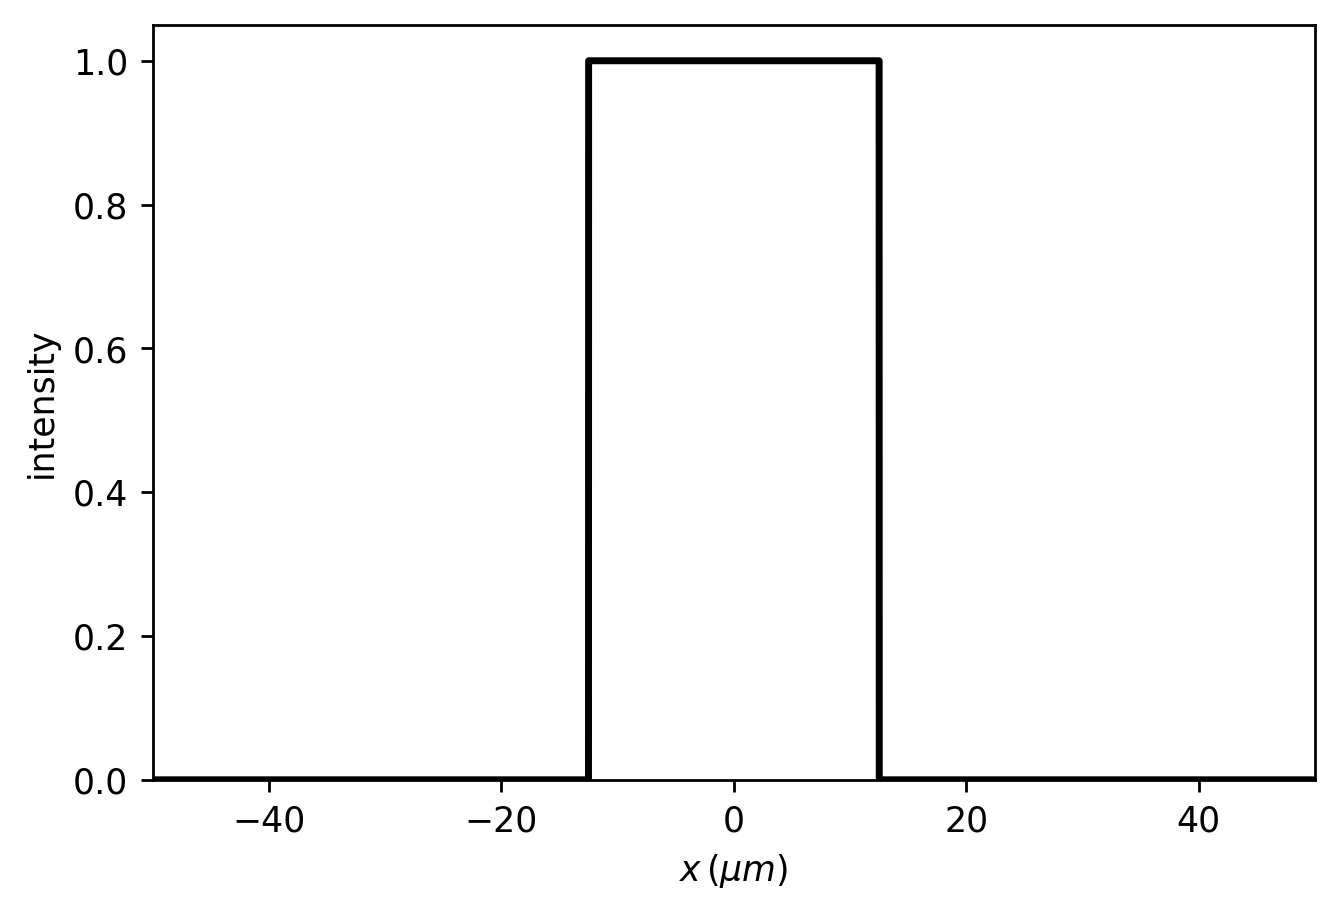

In [4]:
# plane wave
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0)

# slit
t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=25 * um)
t0.draw()

u1 = u0 * t0


Good result: factor 1282.20
Good result: factor 4920.24


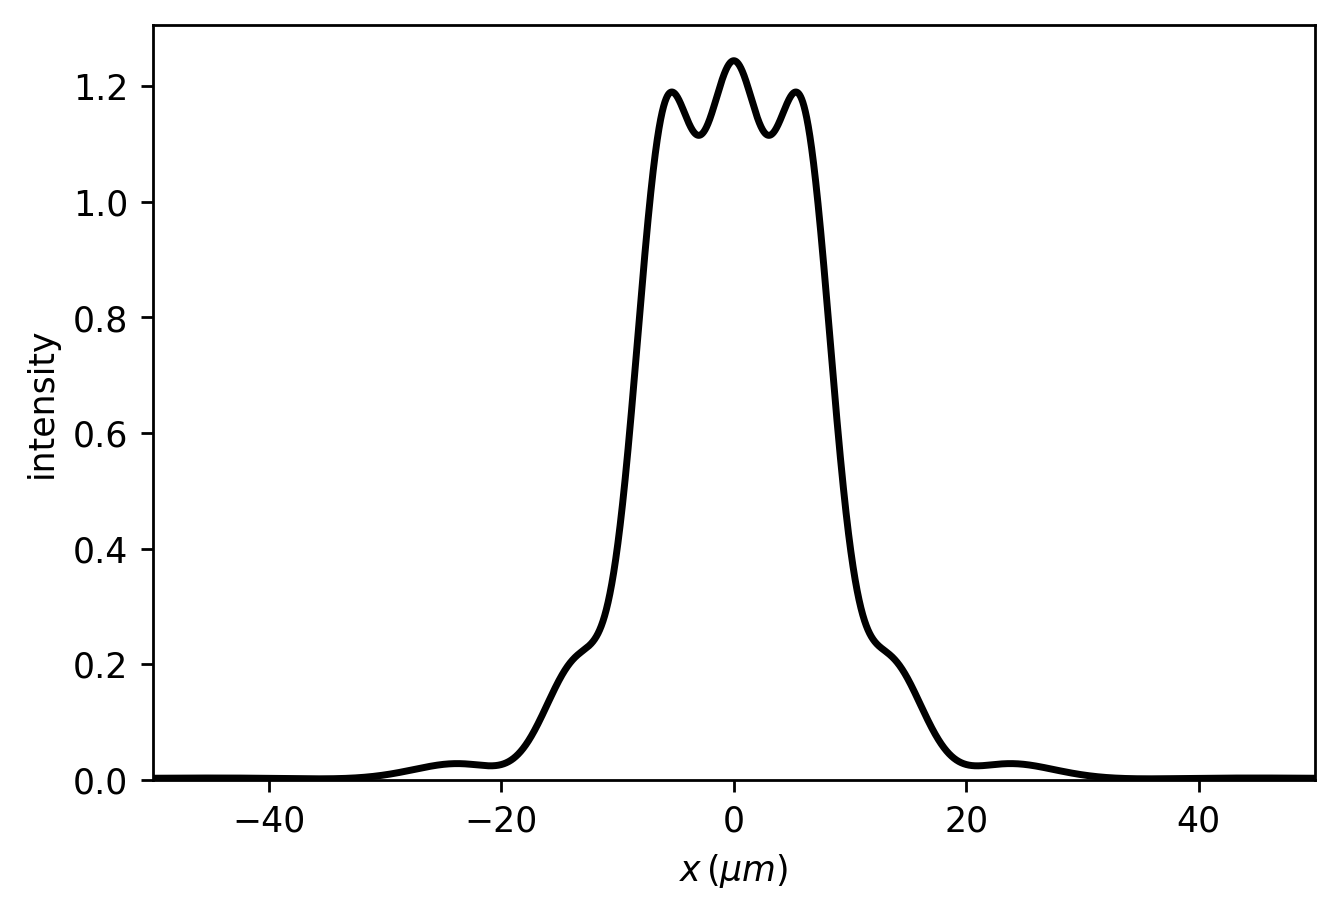

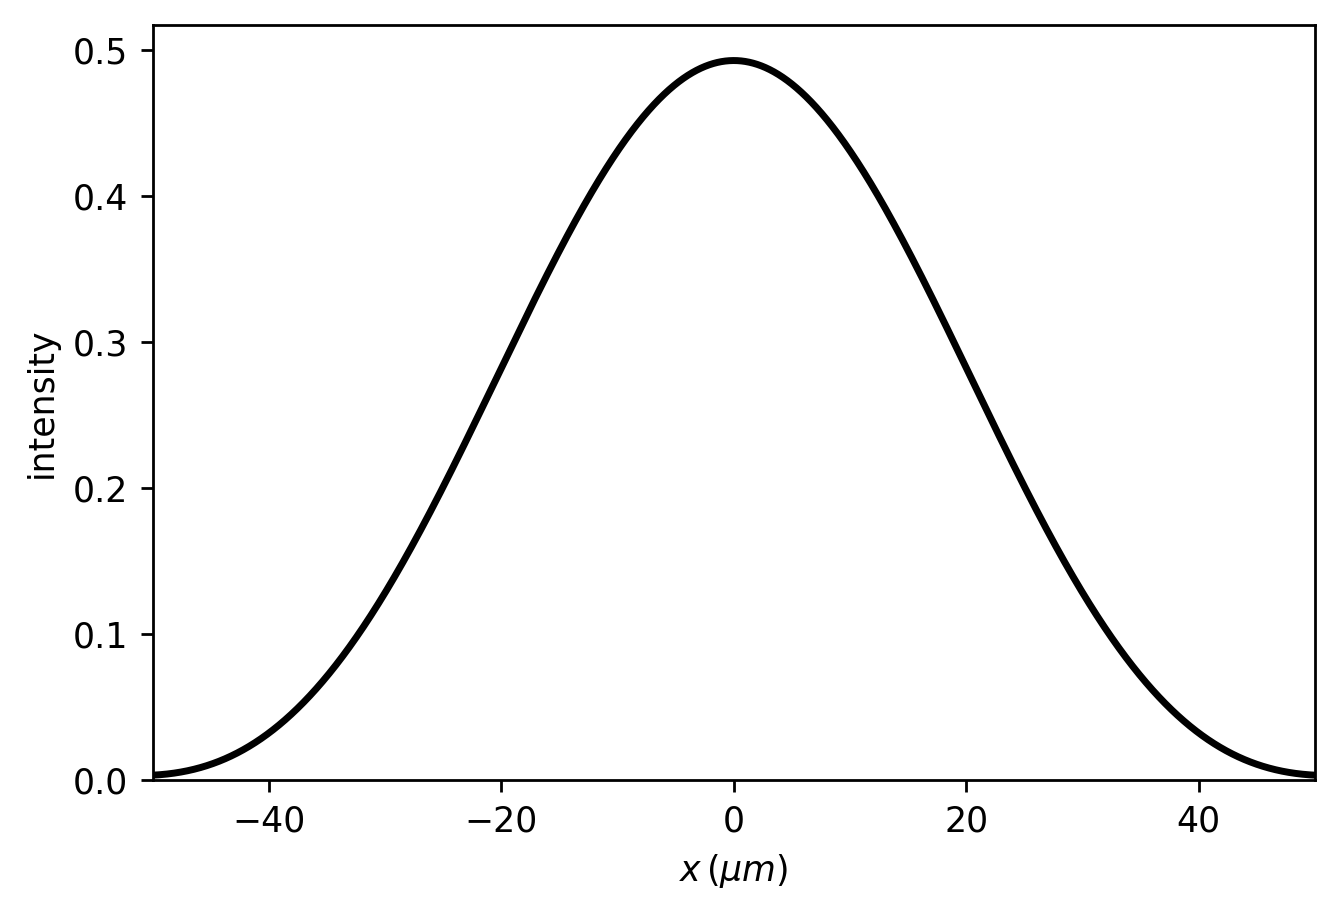

In [5]:
# Propagation a certain distance and draw
u2 = u1.RS(z=25 * um, new_field=True, verbose=True)
u2.draw(kind='intensity')

u3 = u1.RS(z=250 * um, new_field=True, verbose=True)
u3.draw(kind='intensity')


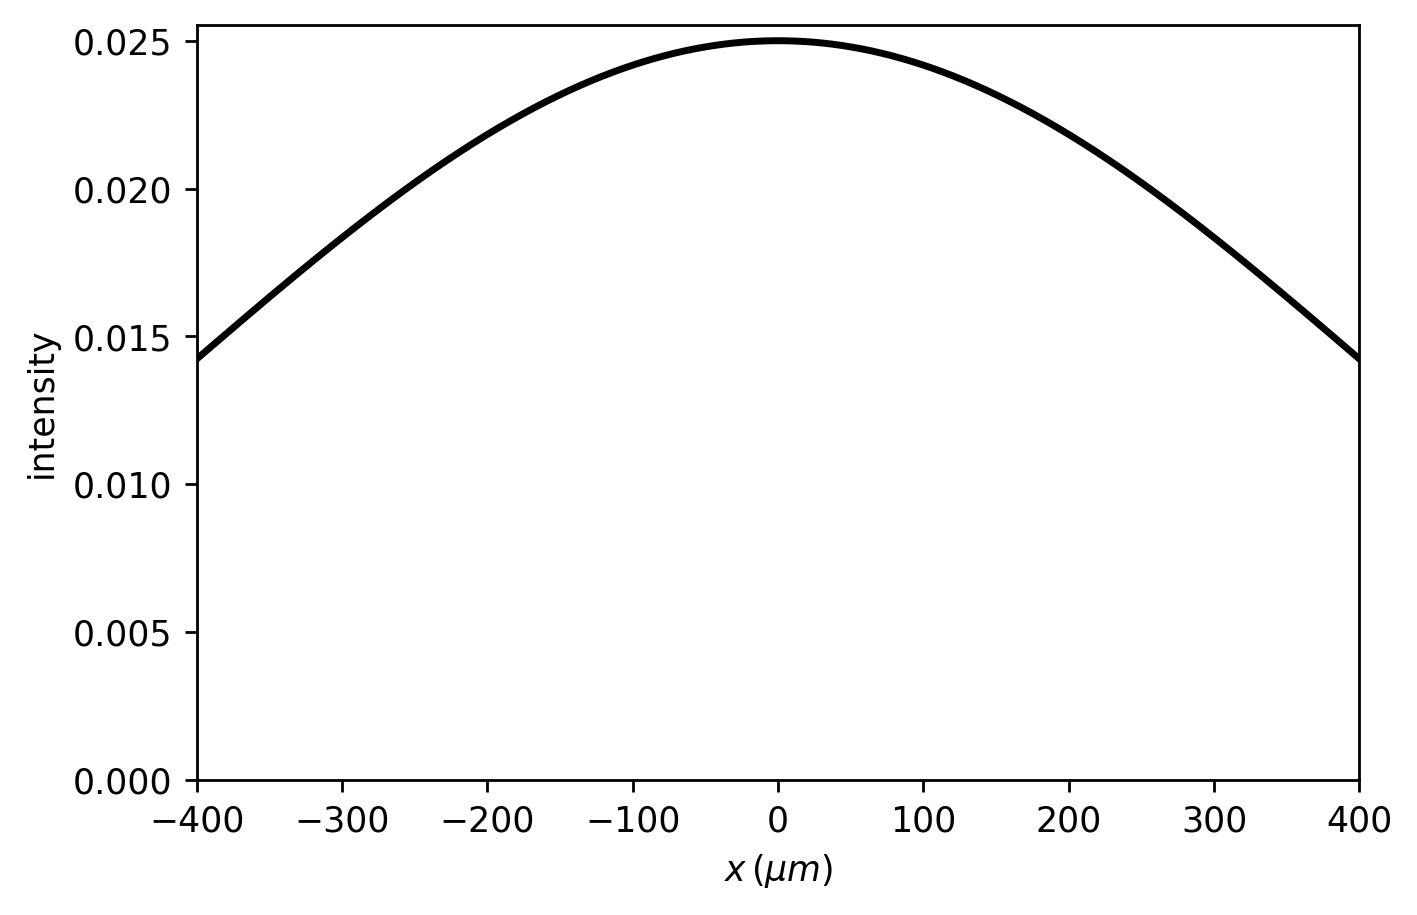

In [6]:
u4 = u1.RS(z=5*mm, amplification=8, new_field=True, verbose=False)
u4.draw(kind='intensity')


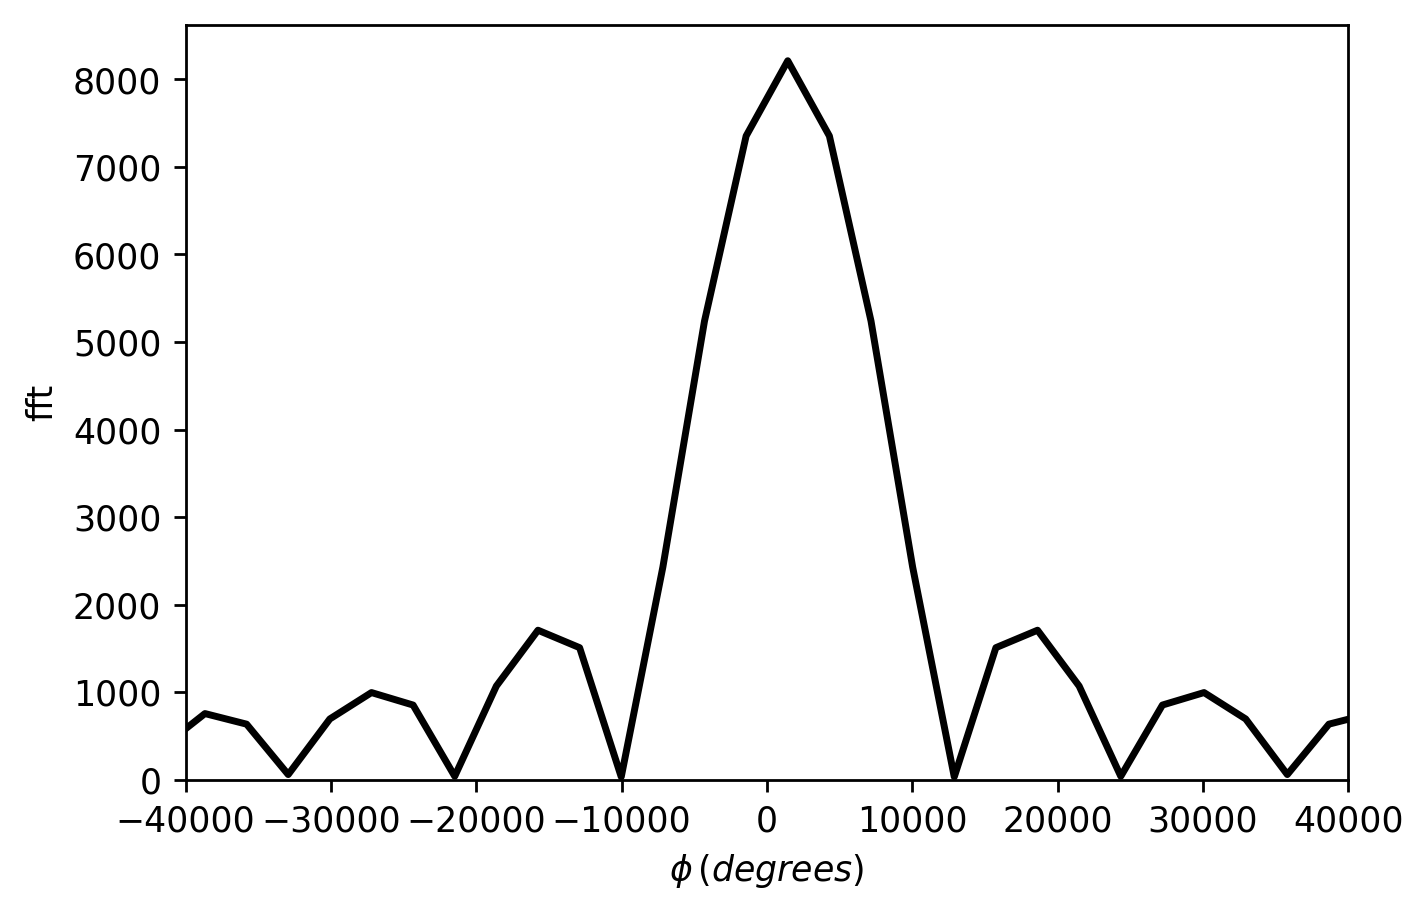

In [7]:
u5 = u2.fft(z=1*mm, remove0=False, new_field=True)
u5.draw(kind='fft', logarithm=False, normalize=True)
plt.xlim(-40000, 40000)
plt.ylim(bottom=0)


## XY

In [8]:
from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw_several_fields


In [9]:
# Datos de lengths predeterminados

x0 = np.linspace(-200*um, 200*um, 1024)
y0 = np.linspace(-200*um, 200*um, 1024)

# Longitud de onda predeterminada
wavelength = 0.6238 * um


In [10]:
# Clase fuentes
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
# Iluminacion de onda plana
u1.plane_wave(A=1, theta=np.pi / 2, phi=0 * degrees)
# Clase masks
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
# slit
t1.slit(x0=0, size=50 * um, angle=0 * degrees)
# Campo transmitido
u2 = u1 * t1


In [11]:
u3 = u2.RS(z=5*mm, new_field=True)


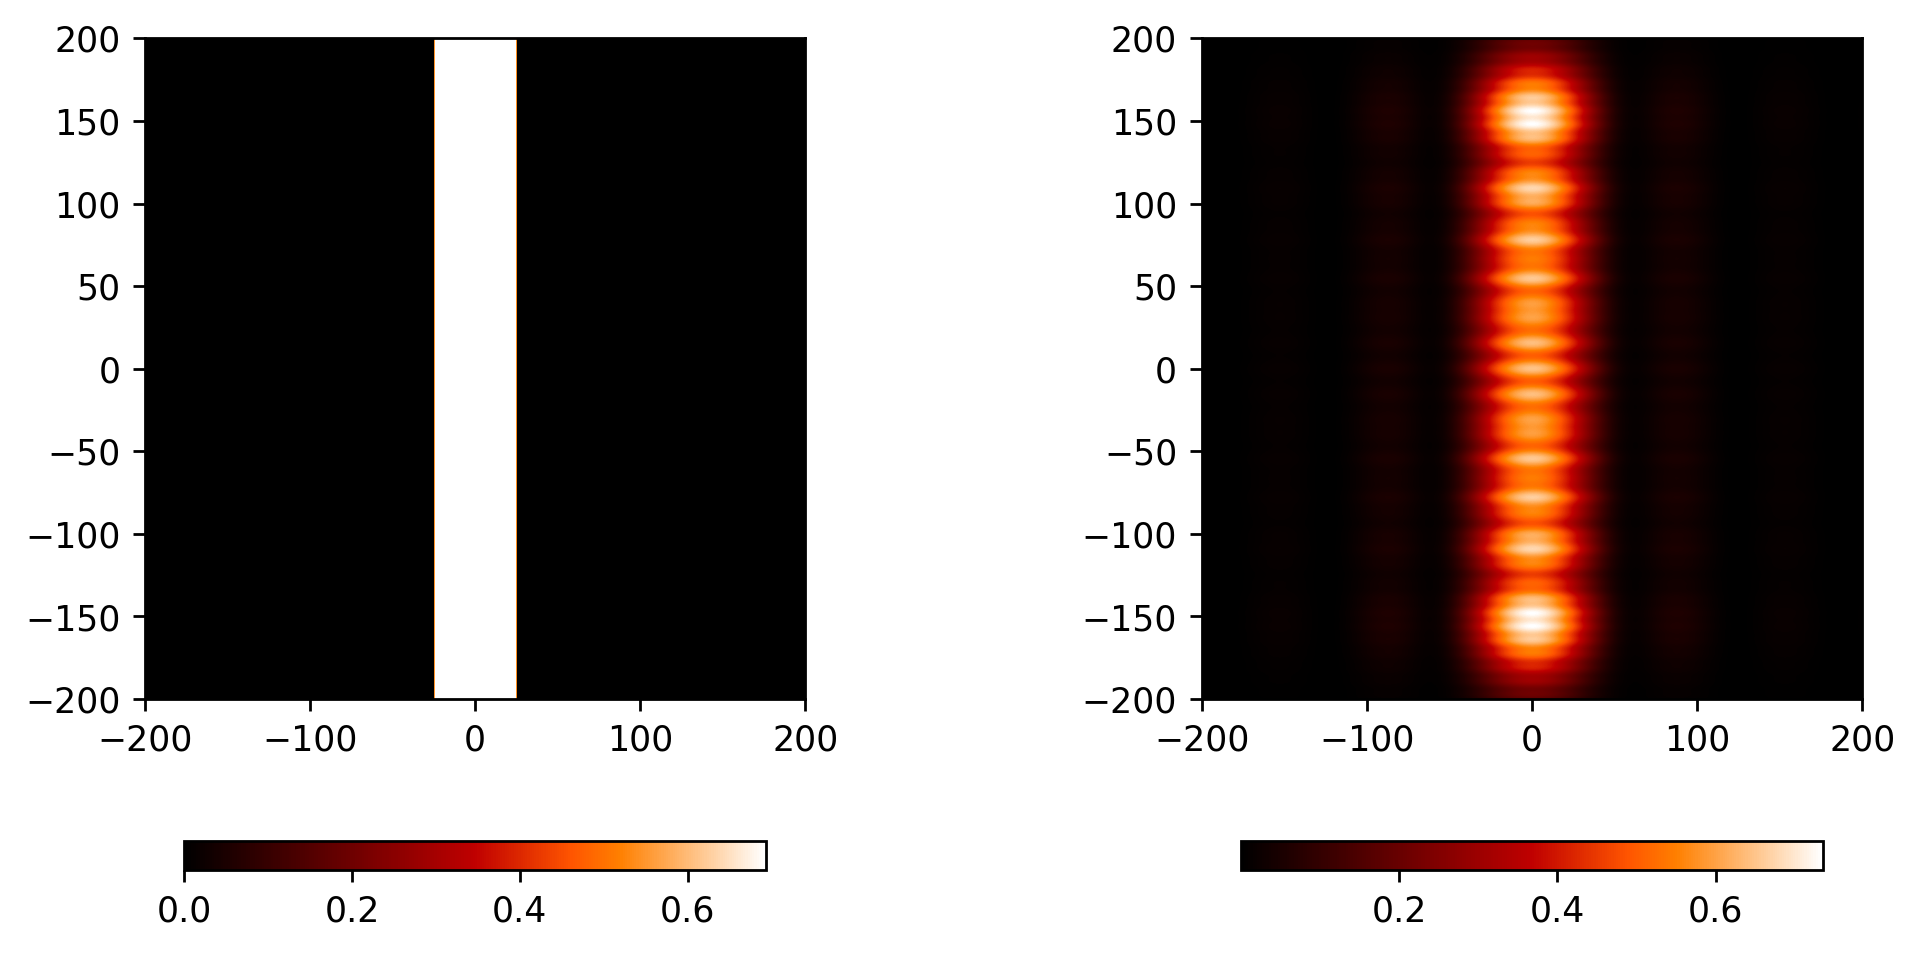

In [12]:
draw_several_fields(fields=(u2, u3), titles=('', ''), logarithm=True)


In [13]:
u3 = u2.fft(remove0=False, new_field=True)


In [14]:
u3.cut_resample(
    x_limits='',
    y_limits='',
    num_points=[1024, 1024])


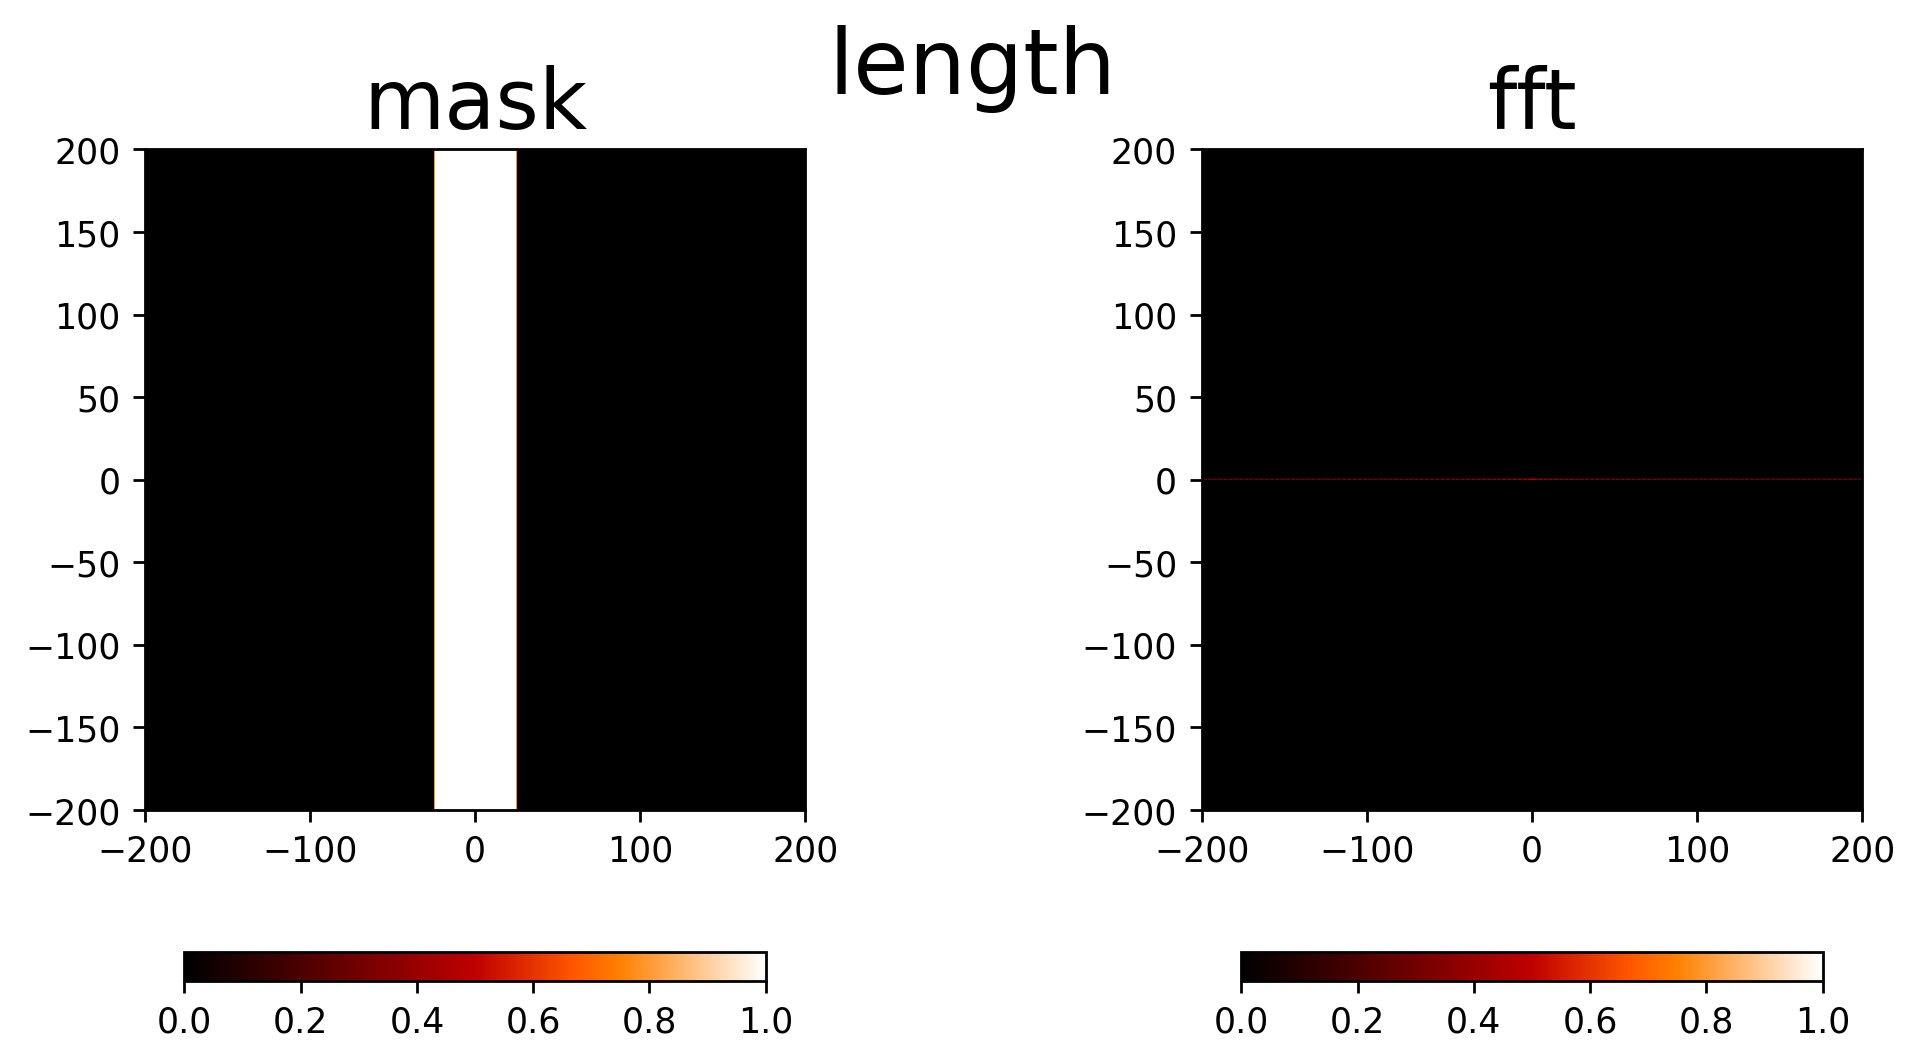

In [15]:
draw_several_fields(
    fields=(u2, u3),
    titles=('mask', 'fft'),
    title='length',
    logarithm=True,
    normalize='maximum')


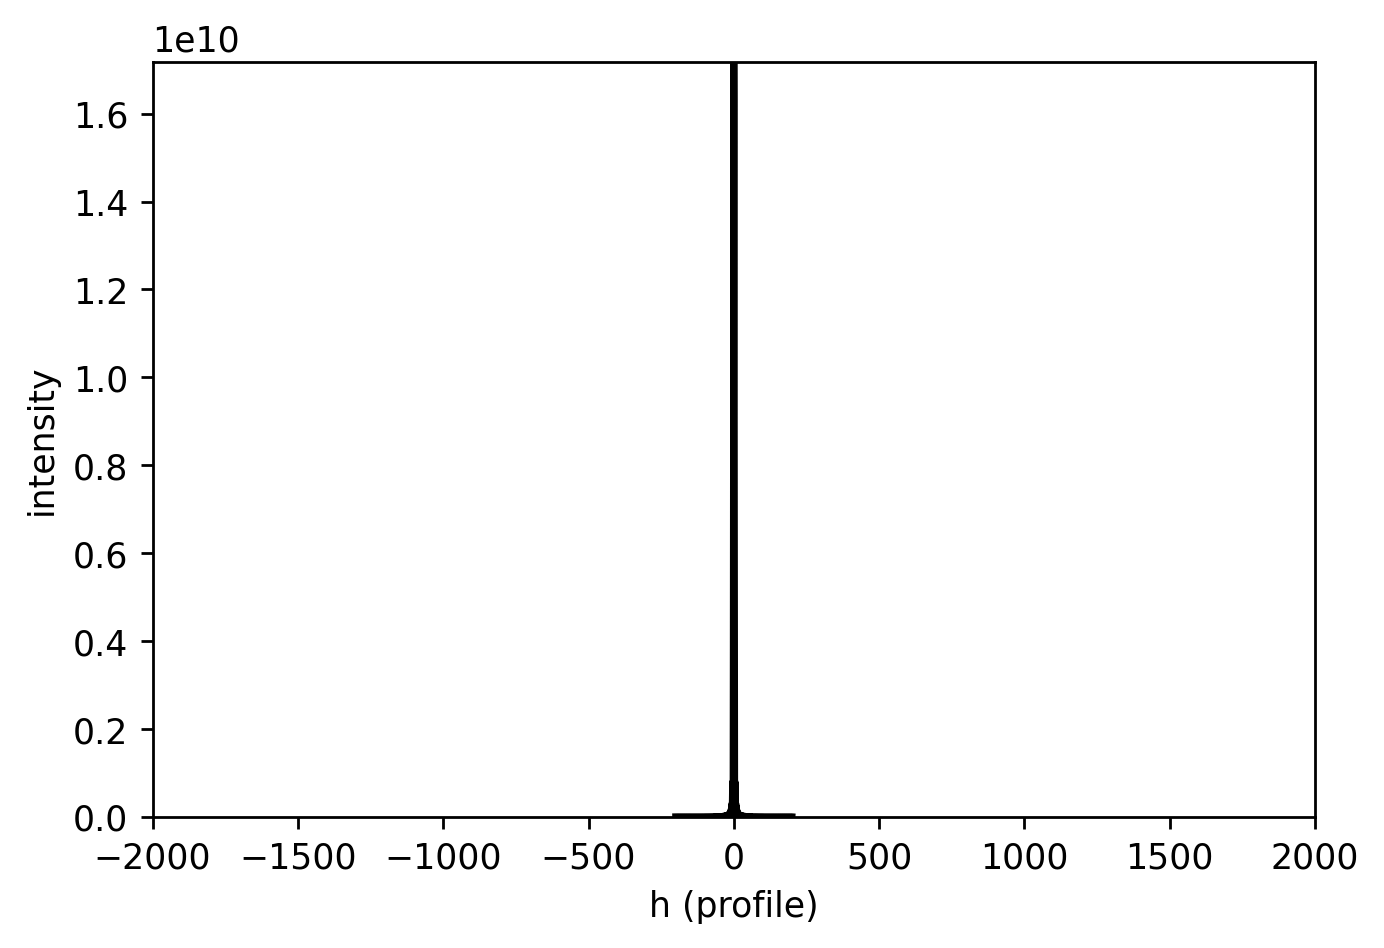

In [16]:
u3.draw_profile(
    point1=(u3.x[0], 0), point2=(u3.x[-1], 0), npixels=1024, kind='intensity', order=1)
plt.xlim(-2000, 2000)


## XZ

In [17]:
from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ


In [18]:
x = np.linspace(-50*um, 50*um, 1024)
z = np.linspace(0*um, 100*um, 1024)
wavelength = 2.5 * um

u1 = Scalar_source_X(x=x, wavelength=wavelength)
u1.plane_wave(theta=0)

t0 = Scalar_mask_X(x=x, wavelength=wavelength)
t0.slit(x0=0, size=40 * um)


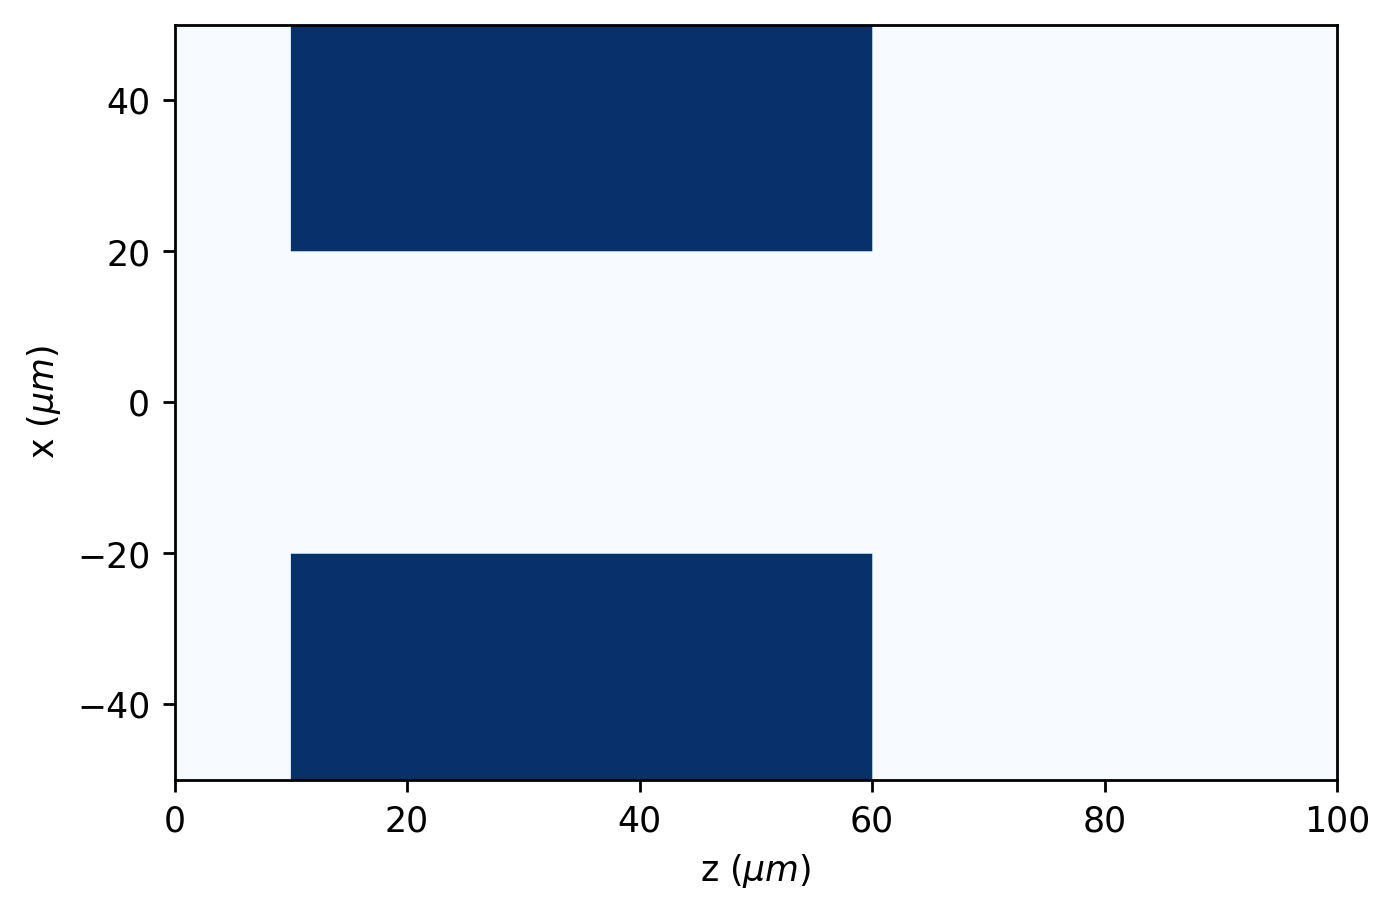

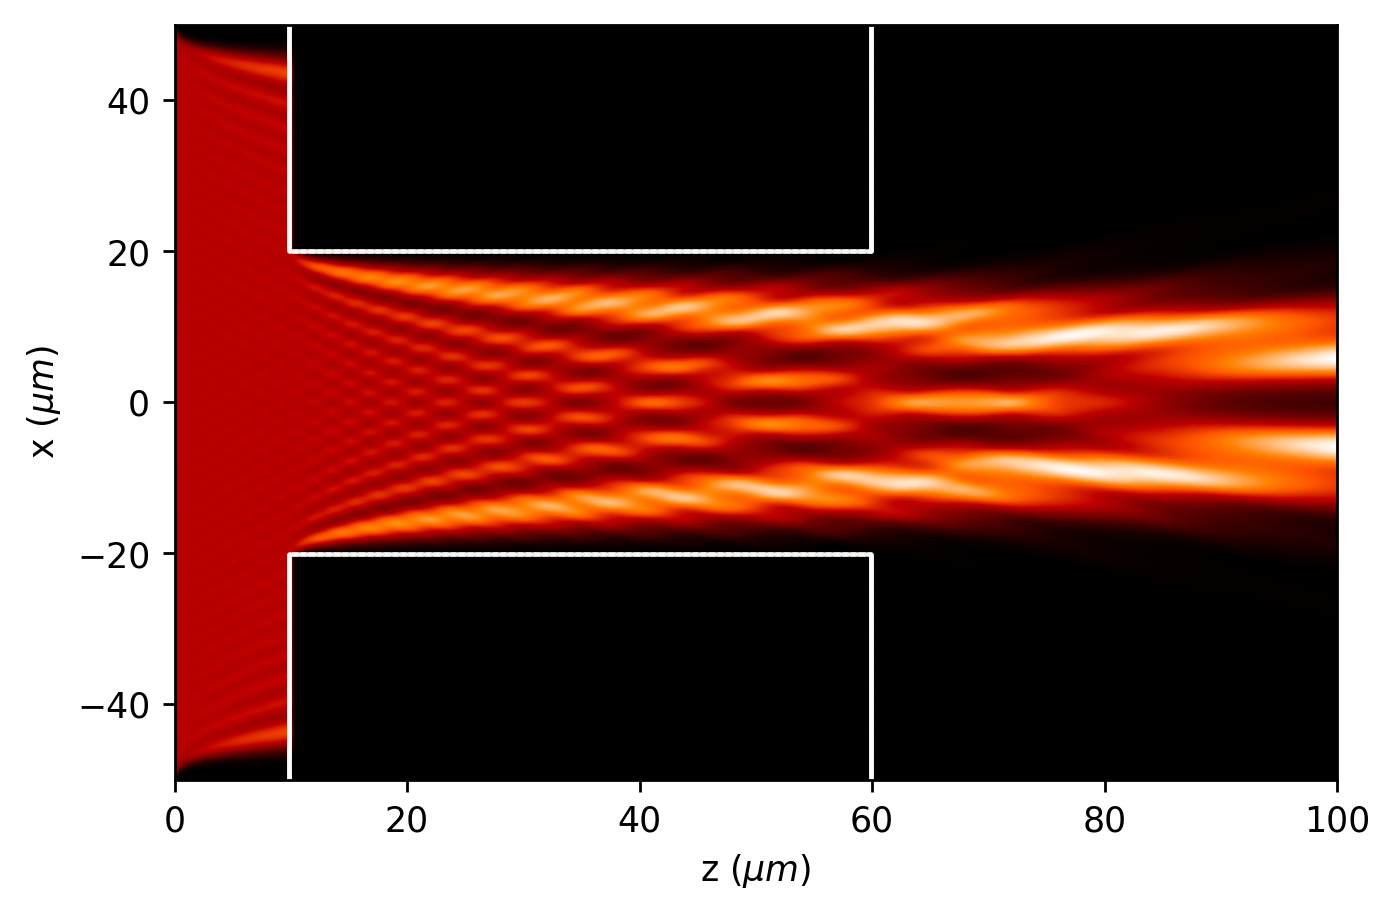

In [19]:
t1 = Scalar_mask_XZ(x=x, z=z, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = z0+50 * um
v_globals = dict(z0=z0, z1=z1)
t1.extrude_mask(
    t=t0, z0=z0, z1=z1, refraction_index=1.5+2j, v_globals=v_globals)
t1.draw_refraction_index(draw_borders=False, )

# Campo transmitido
t1.incident_field(u1)

t1.WPM()
t1.draw(kind='intensity', draw_borders=True)


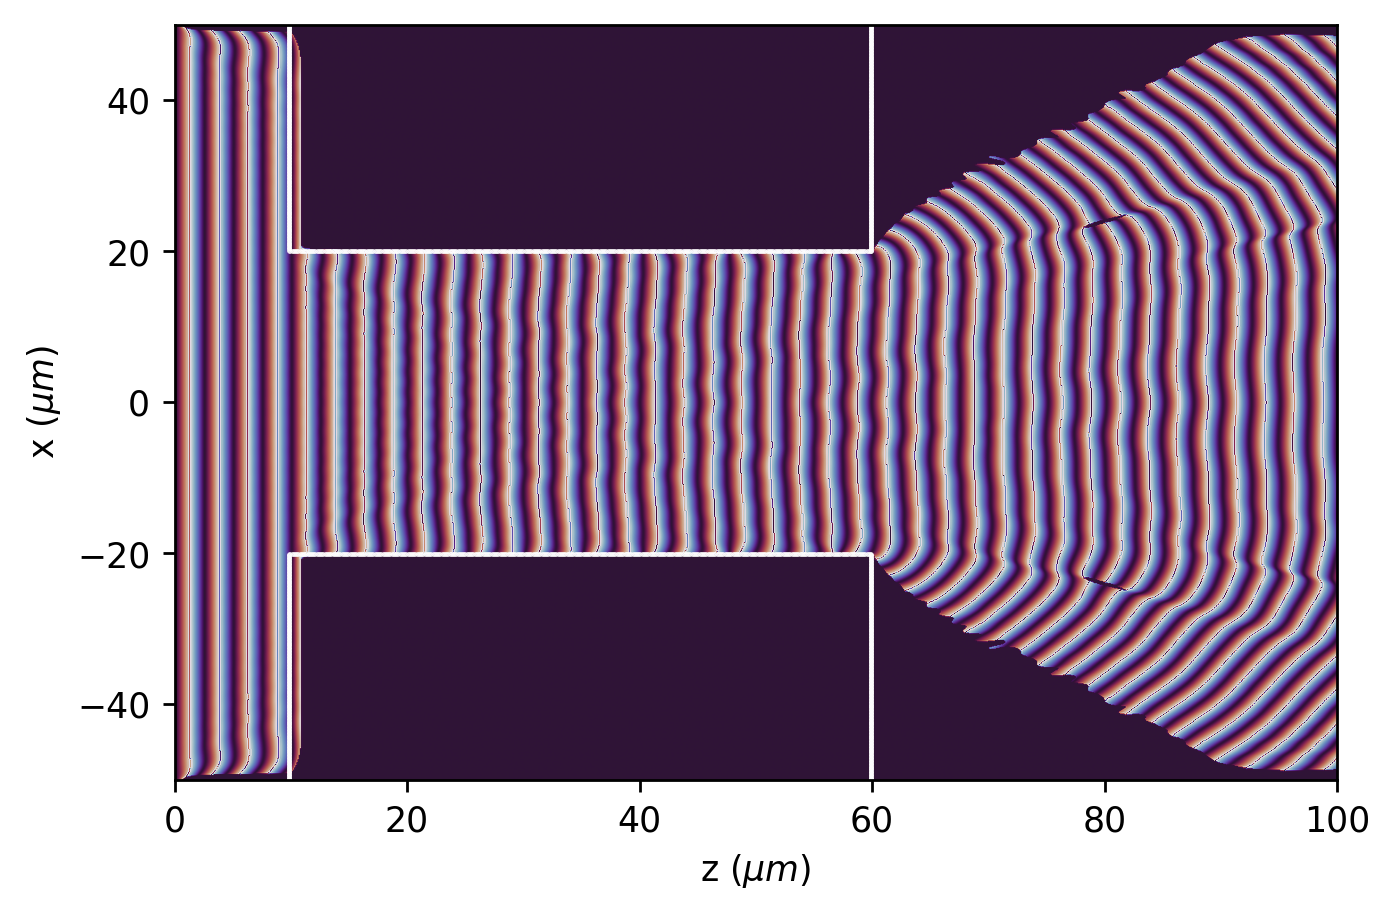

In [22]:
t1.draw(kind='phase', draw_borders=True, percentage_intensity=0.0001)
